# Sentiment Analysis on App reviews

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import six
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('English'))
plt.style.use('ggplot')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Palash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Palash\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Palash\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Palash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#dataset size
df = pd.read_csv("Spotify/Spotify.csv")
df = df.head(1200)
print(df.shape)

(1200, 3)


In [3]:
df['ratings'].value_counts()

5    731
1    216
4    110
3     72
2     71
Name: ratings, dtype: int64

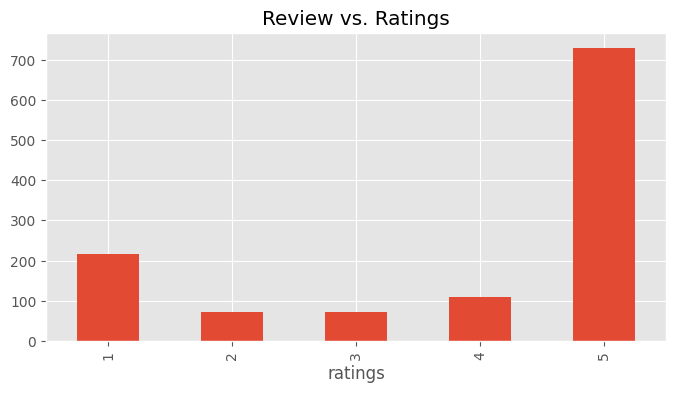

In [4]:
#No. of review vs. ratings
x = df['ratings'].value_counts().sort_index() \
.plot(kind='bar', 
      title='Review vs. Ratings',
      figsize=(8,4))
x.set_xlabel('ratings')
plt.show()

# Data Preprocessing

In [89]:
df.head()

,Id,review,ratings
0,d9355acc-eafb-41fd-836e-18d63a658cbd,Anyone else have spotify just randomly stop pl...,3
1,8a6fcc13-a1db-4008-8418-58c78d62ea6f,Superb,5
2,d54a5540-e387-430b-86e8-3b54add23c1e,I ❤ you Spotify music ☺😘😘,5
3,e5708809-4ab0-4cbb-b340-e0e719c3d309,Hari,1
4,0fbab535-7af6-4d9f-9051-1be3c0dded67,😬😬😬,1


In [90]:
#lowercase, remove url, hastag, punctuation, stopwords etc.
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [91]:
df['review'] = df['review'].apply(data_processing)

In [92]:
df = df.drop_duplicates('review')

In [93]:
#Apply stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [94]:
df['review'] = df['review'].apply(lambda x: stemming(x))

In [95]:
#Preprocessed Dataset
print(df.shape)
df.tail()

(960, 3)


,Id,review,ratings
1192,7a749553-05f6-40ab-87bd-790a435df042,would think playing music would difficult thin...,1
1195,0e38d1d0-5e57-4e56-a05c-0da9f88e957f,good music please dont get extra add playing m...,5
1196,60369f3e-e3a9-419d-9202-3442f4f23b2f,music quality great every song look uploaded a...,5
1197,cb3ad358-788a-4606-98eb-fd0f1c3e7b05,banging,5
1198,2134b583-9234-44ab-9152-3161077665c5,bakwas hai ye beast data,1


In [96]:
csv_data = df.to_csv('Spotify.csv')

In [126]:
ex = df['review'][10]
print(ex)

best way spend often times


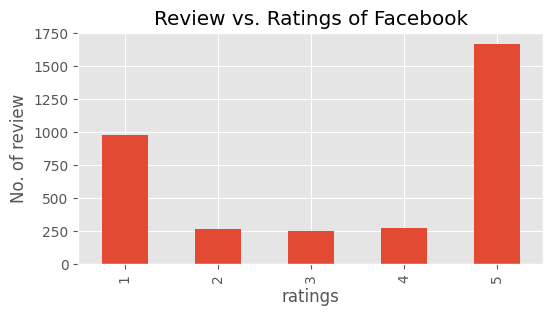

In [127]:
x = df['ratings'].value_counts().sort_index() \
.plot(kind='bar', 
      title='Review vs. Ratings of Facebook',
      figsize=(6,3))
x.set_xlabel('ratings')
x.set_ylabel('No. of review')
plt.show()

# Vader Model

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment = SentimentIntensityAnalyzer()

In [129]:
sentiment.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

In [130]:
ex

'best way spend often times'

In [131]:
df

,Id,review,ratings
0,00603010-2b4b-4694-a4a4-46eef450d2b8,ahsh,5
1,22862e0b-7123-460e-a472-078fb1f2e2c4,bbb,5
2,9536c197-ef49-4f8d-99e2-a25da6b85885,md sajir alam,5
3,69adbb15-e84b-4d2f-bce8-c45b837870cb,nice app love app,5
4,3bdda193-05f3-4631-9983-03340a7d0177,awesome best app world world,5
...,...,...,...
3435,7a749553-05f6-40ab-87bd-790a435df042,would think playing music would difficult thin...,1
3436,0e38d1d0-5e57-4e56-a05c-0da9f88e957f,good music please dont get extra add playing m...,5
3437,60369f3e-e3a9-419d-9202-3442f4f23b2f,music quality great every song look uploaded a...,5
3438,cb3ad358-788a-4606-98eb-fd0f1c3e7b05,banging,5


In [132]:
#Polarity measure for each review
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    tx = row['review']
    m_id = row['review']
    result[m_id] = sentiment.polarity_scores(str(tx))

  0%|          | 0/3440 [00:00<?, ?it/s]

In [133]:
#fitting with dataframe
v = pd.DataFrame(result).T
v = v.reset_index().rename(columns={'index': 'review'})
v = v.merge(df, how='left')

In [134]:
v

,review,neg,neu,pos,compound,Id,ratings
0,ahsh,0.000,1.000,0.000,0.0000,00603010-2b4b-4694-a4a4-46eef450d2b8,5
1,bbb,0.000,1.000,0.000,0.0000,22862e0b-7123-460e-a472-078fb1f2e2c4,5
2,md sajir alam,0.000,1.000,0.000,0.0000,9536c197-ef49-4f8d-99e2-a25da6b85885,5
3,nice app love app,0.000,0.222,0.778,0.7906,69adbb15-e84b-4d2f-bce8-c45b837870cb,5
4,awesome best app world world,0.000,0.265,0.735,0.8519,3bdda193-05f3-4631-9983-03340a7d0177,5
...,...,...,...,...,...,...,...
3435,would think playing music would difficult thin...,0.181,0.671,0.148,-0.1280,7a749553-05f6-40ab-87bd-790a435df042,1
3436,good music please dont get extra add playing m...,0.000,0.462,0.538,0.7184,0e38d1d0-5e57-4e56-a05c-0da9f88e957f,5
3437,music quality great every song look uploaded a...,0.000,0.500,0.500,0.7906,60369f3e-e3a9-419d-9202-3442f4f23b2f,5
3438,banging,0.000,1.000,0.000,0.0000,cb3ad358-788a-4606-98eb-fd0f1c3e7b05,5


# Plot vader results

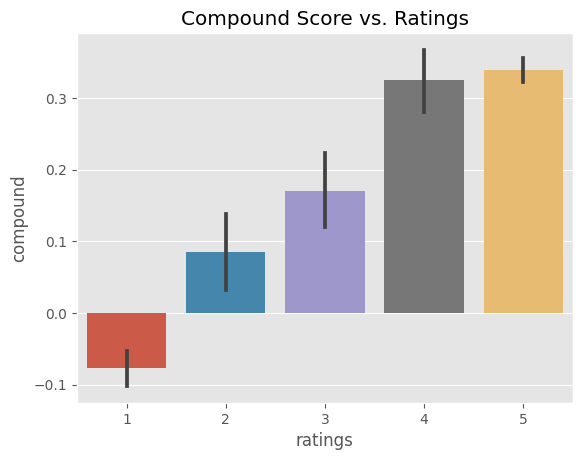

In [135]:
x = sns.barplot(data=v, x='ratings', y='compound')
x.set_title('Compound Score vs. Ratings')
plt.show()

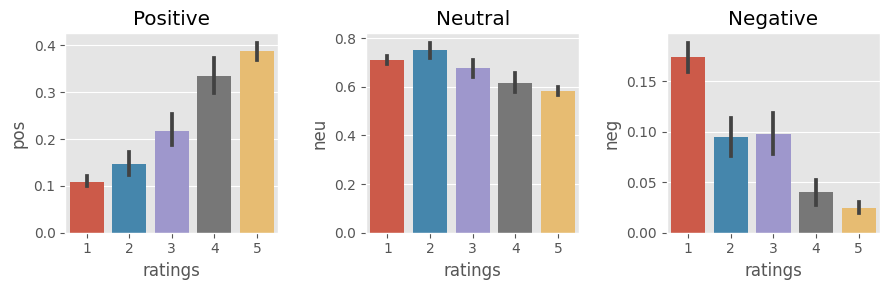

In [136]:
#subplot for each polarity
fig, xs = plt.subplots(1, 3, figsize=(9,3))
sns.barplot(data=v, x='ratings', y='pos', ax=xs[0])
sns.barplot(data=v, x='ratings', y='neu', ax=xs[1])
sns.barplot(data=v, x='ratings', y='neg', ax=xs[2])
xs[0].set_title('Positive')
xs[1].set_title('Neutral')
xs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [5]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [8]:
#Intiating Model
M = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(M)
model = AutoModelForSequenceClassification.from_pretrained(M)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [139]:
print(ex)
sentiment.polarity_scores(ex)

best way spend often times


{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

In [140]:
input_text = tokenizer(ex, return_tensors='pt')
output = model(**input_text)
res = output[0][0].detach().numpy()
res = softmax(res)
res_dict = {
    'roberta_neg' : res[0],
    'roberta_neu' : res[1],
    'roberta_pos' : res[2]
}
print(res_dict)

{'roberta_neg': 0.016454468, 'roberta_neu': 0.39366657, 'roberta_pos': 0.589879}


In [7]:
#calculating polarity score
def polarity_scores_roberta(ex):
    input_text = tokenizer(ex, return_tensors='pt')
    output = model(**input_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    scores = {
        'roberta_neg' : score[0],
        'roberta_neu' : score[1],
        'roberta_pos' : score[2]
    }
    return scores

In [10]:
#Measuring polarity for each review
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        tx = row['review']
        m_id = row['review']
        vader = sentiment.polarity_scores(str(tx))
        vader_rem = {}
        for key, value in vader.items():
            vader_rem[f"vader_{key}"] = value
        roberta = polarity_scores_roberta(str(tx))
        both = {**vader_rem, **roberta}
        res[m_id] = both
    except RuntimeError:
        print(f'Error for id {m_id}')

  0%|          | 0/1200 [00:00<?, ?it/s]

In [161]:
res

{'Ahsh': {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.1796841,
  'roberta_neu': 0.6596708,
  'roberta_pos': 0.16064502},
 'Bbb': {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.25445065,
  'roberta_neu': 0.5010225,
  'roberta_pos': 0.24452683},
 'Md Sajir Alam': {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.15110895,
  'roberta_neu': 0.767879,
  'roberta_pos': 0.081012},
 'nice app i love this app': {'vader_neg': 0.0,
  'vader_neu': 0.3,
  'vader_pos': 0.7,
  'vader_compound': 0.7906,
  'roberta_neg': 0.0027207236,
  'roberta_neu': 0.0076591168,
  'roberta_pos': 0.98962015},
 "Just awesome it's the best app in the world. It's out of this world": {'vader_neg': 0.0,
  'vader_neu': 0.591,
  'vader_pos': 0.409,
  'vader_compound': 0.8519,
  'roberta_neg': 0.0025792255,
  'roberta_neu': 0.0075283055,
  'roberta_pos': 0.9898

In [11]:
#Fitting with dataframe
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'review'})
results_df = results_df.merge(df, how='left')

In [12]:
results_df

,review,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Id,ratings
0,Anyone else have spotify just randomly stop pl...,0.200,0.636,0.164,-0.1027,0.452745,0.508020,0.039235,d9355acc-eafb-41fd-836e-18d63a658cbd,3
1,Superb,0.000,0.000,1.000,0.6249,0.011891,0.168994,0.819115,8a6fcc13-a1db-4008-8418-58c78d62ea6f,5
2,Superb,0.000,0.000,1.000,0.6249,0.011891,0.168994,0.819115,e11515f2-1893-4912-878c-bea0bede20dc,5
3,Superb,0.000,0.000,1.000,0.6249,0.011891,0.168994,0.819115,a2f66dd8-7478-4d89-865b-6f1aa3df52c5,5
4,I ❤ you Spotify music ☺😘😘,0.000,1.000,0.000,0.0000,0.000997,0.011145,0.987858,d54a5540-e387-430b-86e8-3b54add23c1e,5
...,...,...,...,...,...,...,...,...,...,...
1195,You would think that playing music would be a ...,0.152,0.784,0.065,-0.5806,0.836408,0.137029,0.026563,7a749553-05f6-40ab-87bd-790a435df042,1
1196,Good music up. Please don't get extra add on p...,0.000,0.533,0.467,0.7184,0.018931,0.170334,0.810735,0e38d1d0-5e57-4e56-a05c-0da9f88e957f,5
1197,"Music quality is great .!, and every song that...",0.000,0.614,0.386,0.9064,0.001564,0.006758,0.991677,60369f3e-e3a9-419d-9202-3442f4f23b2f,5
1198,Banging,0.000,1.000,0.000,0.0000,0.228237,0.553922,0.217841,cb3ad358-788a-4606-98eb-fd0f1c3e7b05,5


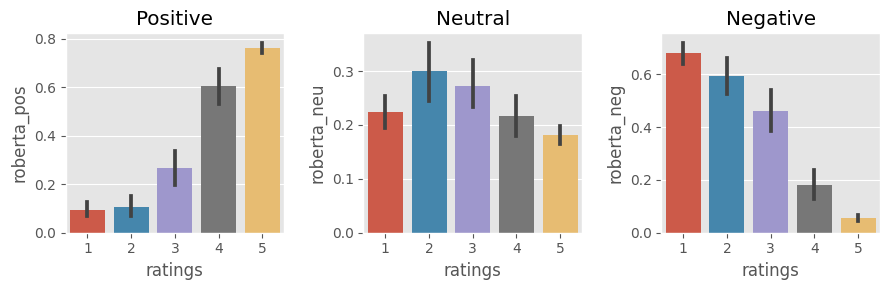

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
sns.barplot(data=results_df, x='ratings', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='ratings', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='ratings', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Compare models

In [14]:
 results_df.columns

Index(['review', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Id', 'ratings'],
      dtype='object')

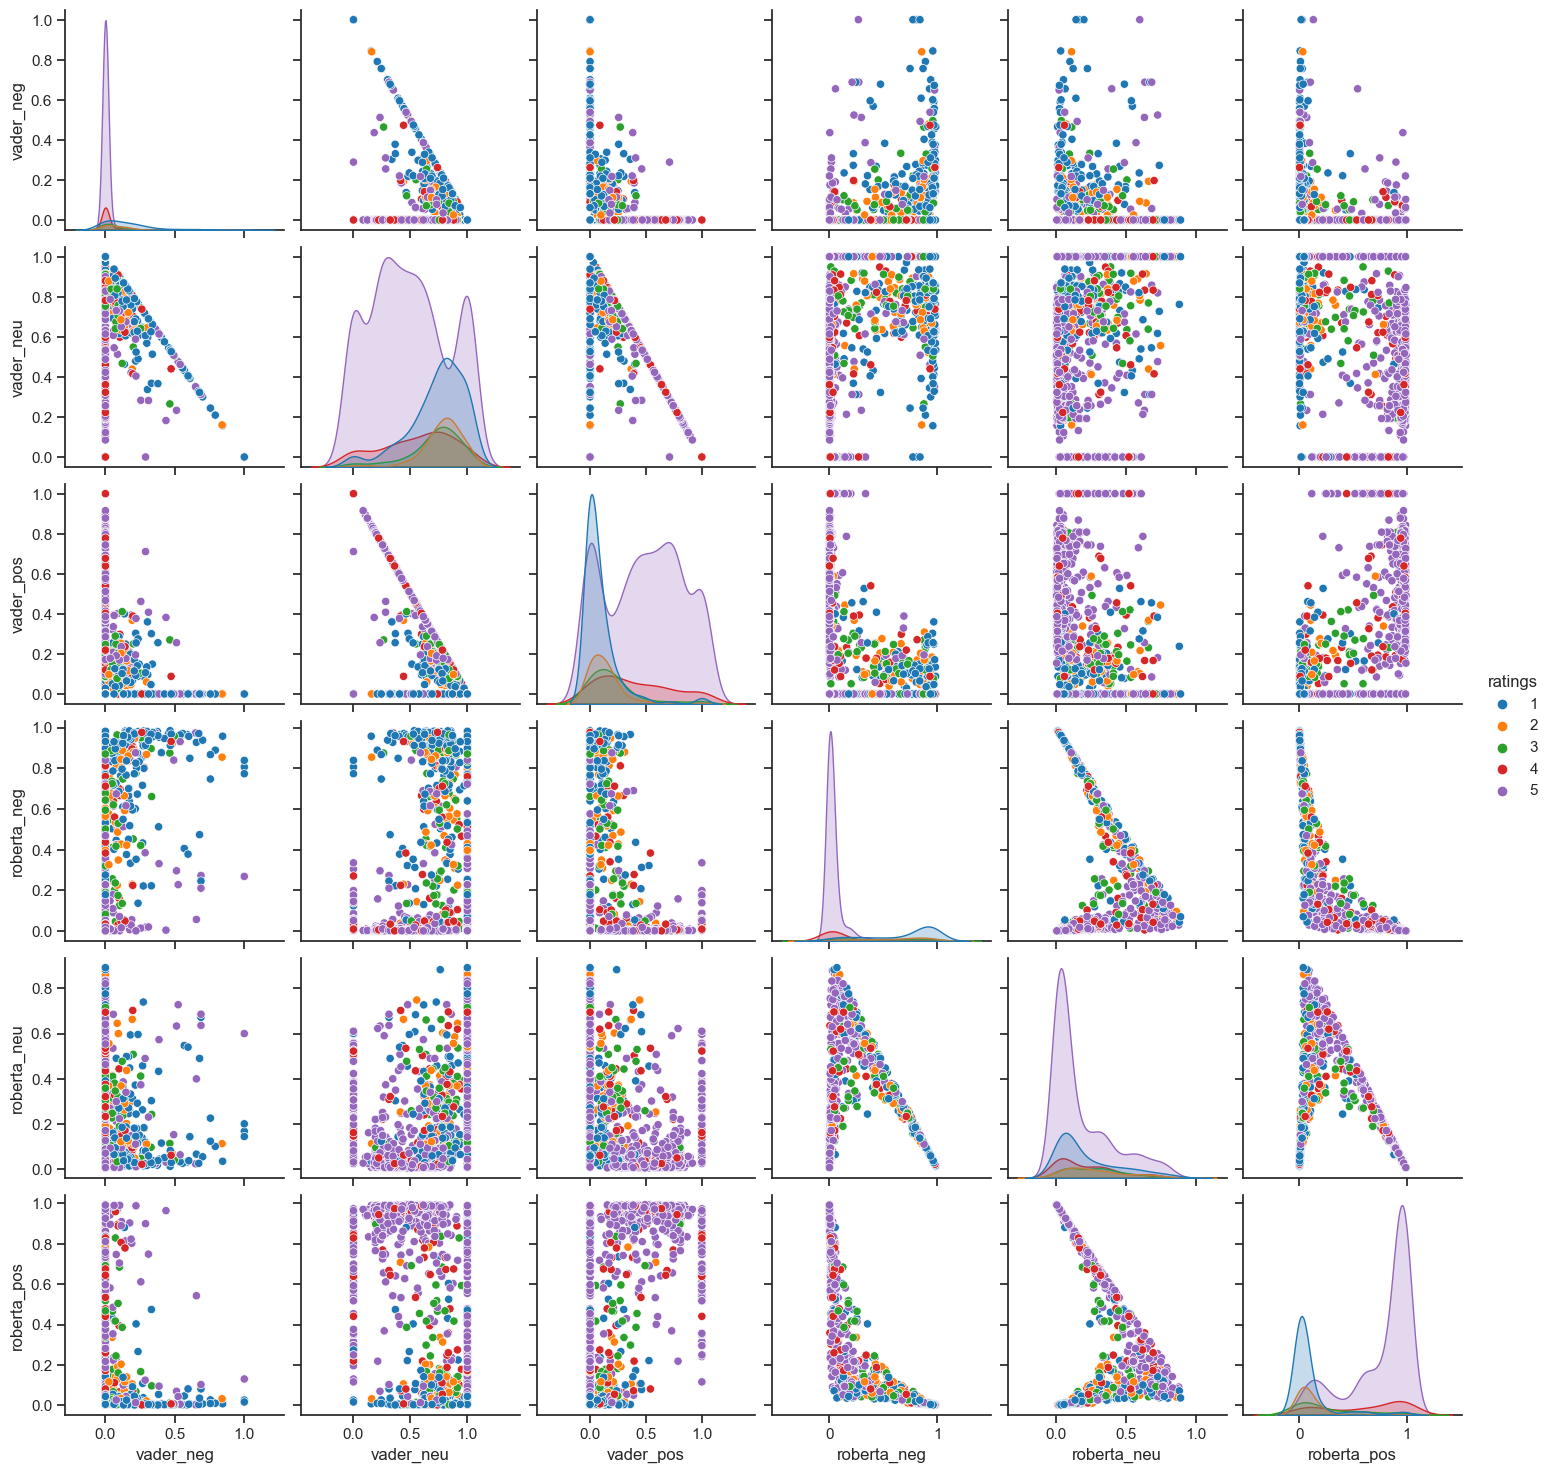

In [15]:
#Pairplot for compare both model
sns.set_theme(style="ticks")
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='ratings',
            palette='tab10')
plt.show()

In [168]:
results_df.query('ratings == 5').sort_values('roberta_pos', ascending=True)['review'].values[0]

'Facebook is very useful. It helps me with my studies, meeting new friends through online, etc.'

# The transformer pipeline

In [13]:
from transformers import pipeline
from collections.abc import Iterable

In [14]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
cannot import name 'Iterable' from 'collections' (C:\Users\Palash\AppData\Local\Programs\Python\Python310\lib\collections\__init__.py)

In [ ]:
sent_pipeline(ex)